# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [ ]:
df = pd.read_excel('/content/datamotor.xlsx')
df.head()

,name,year,seller_type,owner,km_driven,selling_price
0,Ninja 250,2018,Individual,1st owner,0-5.000 km,26000000
1,R25,2016,Individual,1st owner,0-5.000 km,27500000
2,Lexi,2019,Dealer,1st owner,5.000-10.000 km,22300000
3,Beat,2012,Individual,1st owner,40.000-45.000 km,8650000
4,Primavera,2022,Individual,1st owner,0-5.000 km,49000000


# **Data Preprocessing**

## Check the Data Dimensions

In [ ]:
df.shape

(918, 6)

**Interpretasi**

Berdasarkan *output* di atas, didapat bahwa data ini memiliki 855 baris dan 6 kolom.

## Cek tipe data

In [ ]:
df.dtypes

name             object
year              int64
seller_type      object
owner            object
km_driven        object
selling_price     int64
dtype: object

## Cek missing values

In [ ]:
df.isnull().sum()

name              0
year              0
seller_type       0
owner             0
km_driven        91
selling_price     0
dtype: int64

In [ ]:
df[df['km_driven'].isnull()]

,name,year,seller_type,owner,km_driven,selling_price
10,Ninja,2021,Individual,1st owner,NaN,59000000
12,Ninja,2019,Individual,1st owner,NaN,55000000
16,Beat,2009,Individual,1st owner,NaN,8900000
33,PCX,2020,Individual,1st owner,NaN,28450000
57,Vario,2015,Individual,1st owner,NaN,13900000
...,...,...,...,...,...,...
881,Vega R,2009,Individual,1st owner,NaN,5200000
893,Beat,2013,Dealer,1st owner,NaN,7450000
894,Beat,2013,Dealer,1st owner,NaN,7450000
908,Supra,2012,Dealer,1st owner,NaN,6950000


In [ ]:
df= df.dropna()
df.shape

(827, 6)

In [ ]:
df.isnull().sum()

name             0
year             0
seller_type      0
owner            0
km_driven        0
selling_price    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 917
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           827 non-null    object
 1   year           827 non-null    int64 
 2   seller_type    827 non-null    object
 3   owner          827 non-null    object
 4   km_driven      827 non-null    object
 5   selling_price  827 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 45.2+ KB


## EDA

In [ ]:
df.nsmallest(5, 'year')

,name,year,seller_type,owner,km_driven,selling_price
37,Vespa,1984,Individual,1st owner,35.000-40.000 km,85000000
15,Vespa,1985,Individual,1st owner,300.000 km,20000000
191,CB,1986,Individual,1st owner,35.000-40.000 km,16000000
232,Vespa,1986,Individual,1st owner,0-5.000 km,73000000
448,Vespa,1986,Individual,1st owner,45.000-50.000 km,29500000


In [ ]:
df.nlargest(5, 'year')

,name,year,seller_type,owner,km_driven,selling_price
4,Primavera,2022,Individual,1st owner,0-5.000 km,49000000
26,Fino,2022,Dealer,1st owner,0-5.000 km,22500000
29,Aerox,2022,Dealer,1st owner,5.000-10.000 km,26500000
30,Mio,2022,Dealer,1st owner,5.000-10.000 km,14900000
31,NMAX,2022,Dealer,1st owner,5.000-10.000 km,27900000


In [ ]:
df.nlargest(5, 'selling_price')

,name,year,seller_type,owner,km_driven,selling_price
505,Touring,2021,Individual,1st owner,0-5.000 km,875000000
578,Touring,2021,Individual,1st owner,0-5.000 km,875000000
649,Touring,2021,Individual,1st owner,0-5.000 km,875000000
710,Touring,2021,Individual,1st owner,0-5.000 km,875000000
684,Touring,2012,Individual,1st owner,10.000-15.000 km,555000000


In [ ]:
df.nsmallest(5, 'selling_price')

,name,year,seller_type,owner,km_driven,selling_price
11,Mio,2007,Individual,3rd owner,70.000-75.000 km,2950000
149,Mio,2007,Individual,1st owner,110.000-115.000 km,4300000
218,Mio,2007,Individual,2nd owner,110.000-115.000 km,4300000
295,Mio,2007,Individual,2nd owner,110.000-115.000 km,4300000
363,Mio,2007,Individual,1st owner,110.000-115.000 km,4300000


In [ ]:
df.name.value_counts()

PCX            78
NMAX           73
Beat           61
Vario          59
Mio            56
               ..
CRF250Rally     1
Triumph         1
Win 100         1
Vixion          1
Soul GT         1
Name: name, Length: 62, dtype: int64

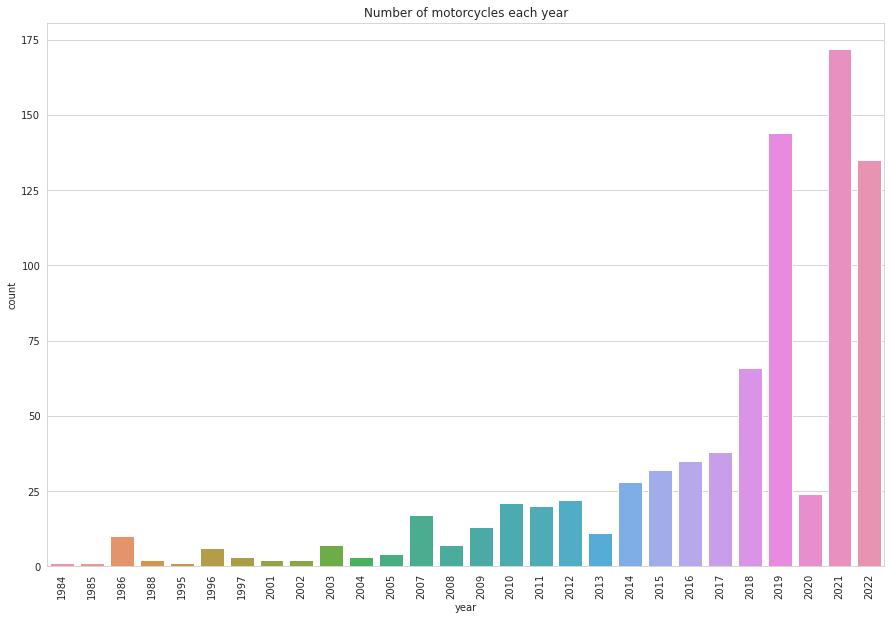

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.countplot(df.year)
plt.title("Number of motorcycles each year")
plt.xticks(rotation=90);
plt.show()

In [ ]:
df.year.value_counts()

2021    172
2019    144
2022    135
2018     66
2017     38
2016     35
2015     32
2014     28
2020     24
2012     22
2010     21
2011     20
2007     17
2009     13
2013     11
1986     10
2008      7
2003      7
1996      6
2005      4
1997      3
2004      3
2002      2
2001      2
1988      2
1984      1
1985      1
1995      1
Name: year, dtype: int64

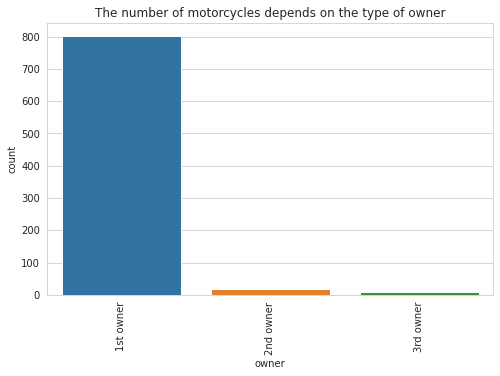

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df.owner);
plt.title("The number of motorcycles depends on the type of owner")
plt.xticks(rotation=90);
plt.show()

In [ ]:
df.owner.value_counts()

1st owner    802
2nd owner     17
3rd owner      8
Name: owner, dtype: int64

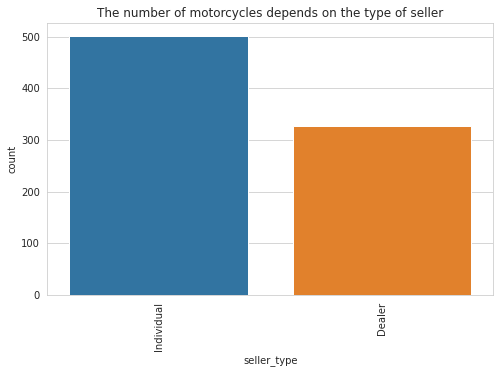

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(df.seller_type);
plt.title("The number of motorcycles depends on the type of seller")
plt.xticks(rotation=90);
plt.show()

In [ ]:
df.seller_type.value_counts()

Individual    501
Dealer        326
Name: seller_type, dtype: int64

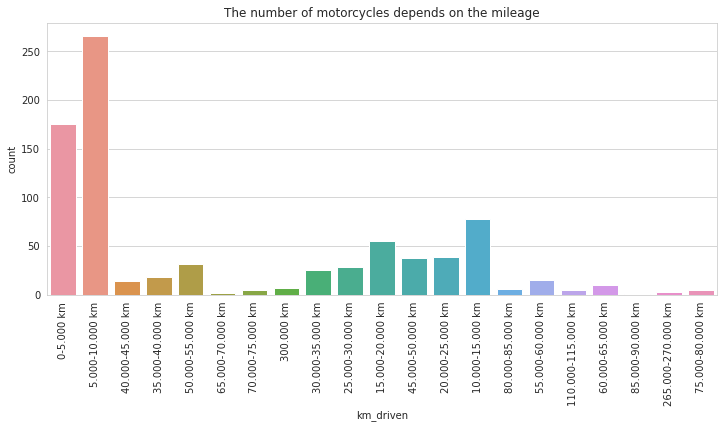

In [ ]:
fig = plt.figure(figsize=(12, 5))
sns.countplot(df.km_driven);
plt.title("The number of motorcycles depends on the mileage")
plt.xticks(rotation=90);
plt.show()

In [ ]:
df.km_driven.value_counts()

5.000-10.000 km       266
0-5.000 km            175
10.000-15.000 km       78
15.000-20.000 km       55
20.000-25.000 km       39
45.000-50.000 km       38
50.000-55.000 km       32
25.000-30.000 km       28
30.000-35.000 km       25
35.000-40.000 km       18
55.000-60.000 km       15
40.000-45.000 km       14
60.000-65.000 km       10
300.000 km              7
80.000-85.000 km        6
70.000-75.000 km        5
110.000-115.000 km      5
75.000-80.000 km        5
265.000-270.000 km      3
65.000-70.000 km        2
85.000-90.000 km        1
Name: km_driven, dtype: int64

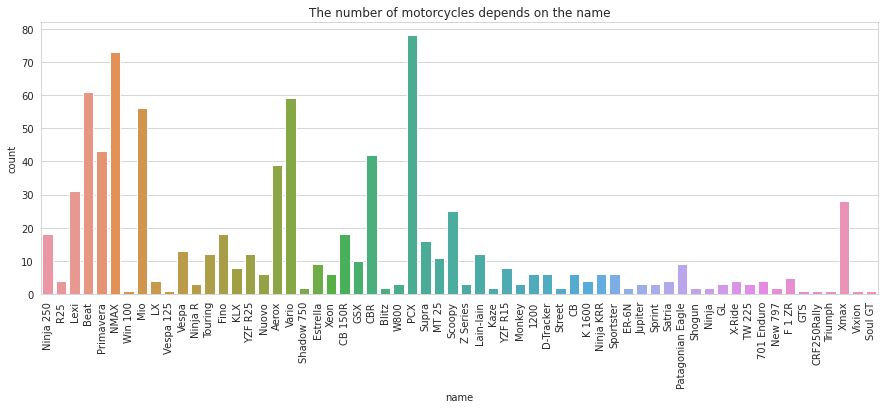

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(df.name);
plt.title("The number of motorcycles depends on the name")
plt.xticks(rotation=90);
plt.show()

In [ ]:
df.name.value_counts()

PCX            78
NMAX           73
Beat           61
Vario          59
Mio            56
               ..
CRF250Rally     1
Triumph         1
Win 100         1
Vixion          1
Soul GT         1
Name: name, Length: 62, dtype: int64

# **Modelling Preparation**

## Label Encoding

In [ ]:
df.head()

,name,year,seller_type,owner,km_driven,selling_price
0,Ninja 250,2018,Individual,1st owner,0-5.000 km,26000000
1,R25,2016,Individual,1st owner,0-5.000 km,27500000
2,Lexi,2019,Dealer,1st owner,5.000-10.000 km,22300000
3,Beat,2012,Individual,1st owner,40.000-45.000 km,8650000
4,Primavera,2022,Individual,1st owner,0-5.000 km,49000000


In [ ]:
df.name.unique()

array(['Ninja 250', 'R25', 'Lexi', 'Beat', 'Primavera', 'NMAX', 'Win 100',
       'Mio', 'LX', 'Vespa 125', 'Vespa', 'Ninja R', 'Touring', 'Fino',
       'KLX', 'YZF R25', 'Nuovo', 'Aerox', 'Vario', 'Shadow 750',
       'Estrella', 'Xeon', 'CB 150R', 'GSX', 'CBR', 'Blitz', 'W800',
       'PCX', 'Supra', 'MT 25', 'Scoopy', 'Z Series', 'Lain-lain', 'Kaze',
       'YZF R15', 'Monkey', '1200', 'D-Tracker', 'Street', 'CB', 'K 1600',
       'Ninja KRR', 'Sportster', 'ER-6N', 'Jupiter', 'Sprint', 'Satria',
       'Patagonian Eagle', 'Shogun', 'Ninja', 'GL', 'X-Ride', 'TW 225',
       '701 Enduro', 'New 797', 'F 1 ZR', 'GTS', 'CRF250Rally', 'Triumph',
       'Xmax', 'Vixion', 'Soul GT'], dtype=object)

In [ ]:
df = df.replace({'name' : 
            {'Ninja 250' : 0 ,'R25' : 1 ,'Lexi' : 2 ,'Beat' : 3 ,'Primavera' : 4 ,'NMAX' : 5 ,'Win 100' : 6 ,'Mio' : 7 ,'LX' : 8 ,'Vespa 125' : 9 ,'Vespa' : 10 ,'Ninja R' : 11 ,'Touring' : 12 ,'Fino' : 13 ,'KLX' : 14 ,'YZF R25' : 15 ,'Nuovo' : 16 ,'Aerox' : 17 ,'Vario' : 18 ,'Shadow 750' : 19 ,'Estrella' : 20 ,'Xeon' : 21 ,'CB 150R' : 22 ,'GSX' : 23 ,'CBR' : 24 ,'Blitz' : 25 ,'W800' : 26 ,'PCX' : 27 ,'Supra' : 28 ,'MT 25' : 29 ,'Scoopy' : 30 ,'Z Series' : 31 ,'Lain-lain' : 32 ,'Kaze' : 33 ,'YZF R15' : 34 ,'Monkey' : 35 ,'1200' : 36 ,'D-Tracker' : 37 ,'Street' : 38 ,'CB' : 39 ,'K 1600' : 40 ,'Ninja KRR' : 41 ,'Sportster' : 42 ,'ER-6N' : 43 ,'Jupiter' : 44 ,'Sprint' : 45 ,'Satria' : 46 ,'Patagonian Eagle' : 47 ,'Shogun' : 48 ,'Ninja' : 49 ,'GL' : 50 ,'X-Ride' : 51 ,'TW 225' : 52 ,'701 Enduro' : 53 ,'New 797' : 54 ,'F 1 ZR' : 55 ,'GTS' : 56 ,'CRF250Rally' : 57 ,'Triumph' : 58 ,'Xmax' : 59 ,'Vixion' : 60 ,'Soul GT' : 61 }
             })

In [ ]:
df['name'] = df['name'].astype(np.int64)

In [ ]:
df.km_driven.unique()

array(['0-5.000 km', '5.000-10.000 km', '40.000-45.000 km',
       '35.000-40.000 km', '50.000-55.000 km', '65.000-70.000 km',
       '70.000-75.000 km', '300.000 km', '30.000-35.000 km',
       '25.000-30.000 km', '15.000-20.000 km', '45.000-50.000 km',
       '20.000-25.000 km', '10.000-15.000 km', '80.000-85.000 km',
       '55.000-60.000 km', '110.000-115.000 km', '60.000-65.000 km',
       '85.000-90.000 km', '265.000-270.000 km', '75.000-80.000 km'],
      dtype=object)

In [ ]:
df = df.replace({'km_driven' : 
            {'0-5.000 km' : 0 ,'5.000-10.000 km' : 1 ,'40.000-45.000 km' : 2 ,'35.000-40.000 km' : 3 ,'50.000-55.000 km' : 4 ,'65.000-70.000 km' : 5 ,'70.000-75.000 km' : 6 ,'300.000 km' : 7 ,'30.000-35.000 km' : 8 ,'25.000-30.000 km' : 9 ,'15.000-20.000 km' : 10 ,'45.000-50.000 km' : 11 ,'20.000-25.000 km' : 12 ,'10.000-15.000 km' : 13 ,'80.000-85.000 km' : 14 ,'55.000-60.000 km' : 15 ,'110.000-115.000 km' : 16 ,'60.000-65.000 km' : 17 ,'85.000-90.000 km' : 18 ,'265.000-270.000 km' : 19 ,'75.000-80.000 km' : 20 }
             })

In [ ]:
df['km_driven'] = df['km_driven'].astype(np.int64)

In [ ]:
df = df.replace({'owner' : 
            {'1st owner' : 0 ,'2nd owner' : 1 ,'3rd owner' : 2 }
             })

In [ ]:
df['owner'] = df['owner'].astype(np.int64)

In [ ]:
df = df.replace({'seller_type' : 
            { 'Individual' : 0 ,'Dealer' : 1 }
             })

In [ ]:
df['seller_type'] = df['seller_type'].astype(np.int64)

In [ ]:
df.head()

,name,year,seller_type,owner,km_driven,selling_price
0,0,2018,0,0,0,26000000
1,1,2016,0,0,0,27500000
2,2,2019,1,0,1,22300000
3,3,2012,0,0,2,8650000
4,4,2022,0,0,0,49000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 917
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   name           827 non-null    int64
 1   year           827 non-null    int64
 2   seller_type    827 non-null    int64
 3   owner          827 non-null    int64
 4   km_driven      827 non-null    int64
 5   selling_price  827 non-null    int64
dtypes: int64(6)
memory usage: 77.5 KB


**Save Clean Dataset for modeling**

In [ ]:
#df.to_excel('Motorcycle Clean-Data.xlsx', index = False)

# **Modelling**

In [ ]:
X = df.drop('selling_price',axis=1)
y = df['selling_price']

In [ ]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Instantiate and fit the RandomForestClassifier
from sklearn import tree
rf = tree.DecisionTreeClassifier(max_depth=3)
rf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

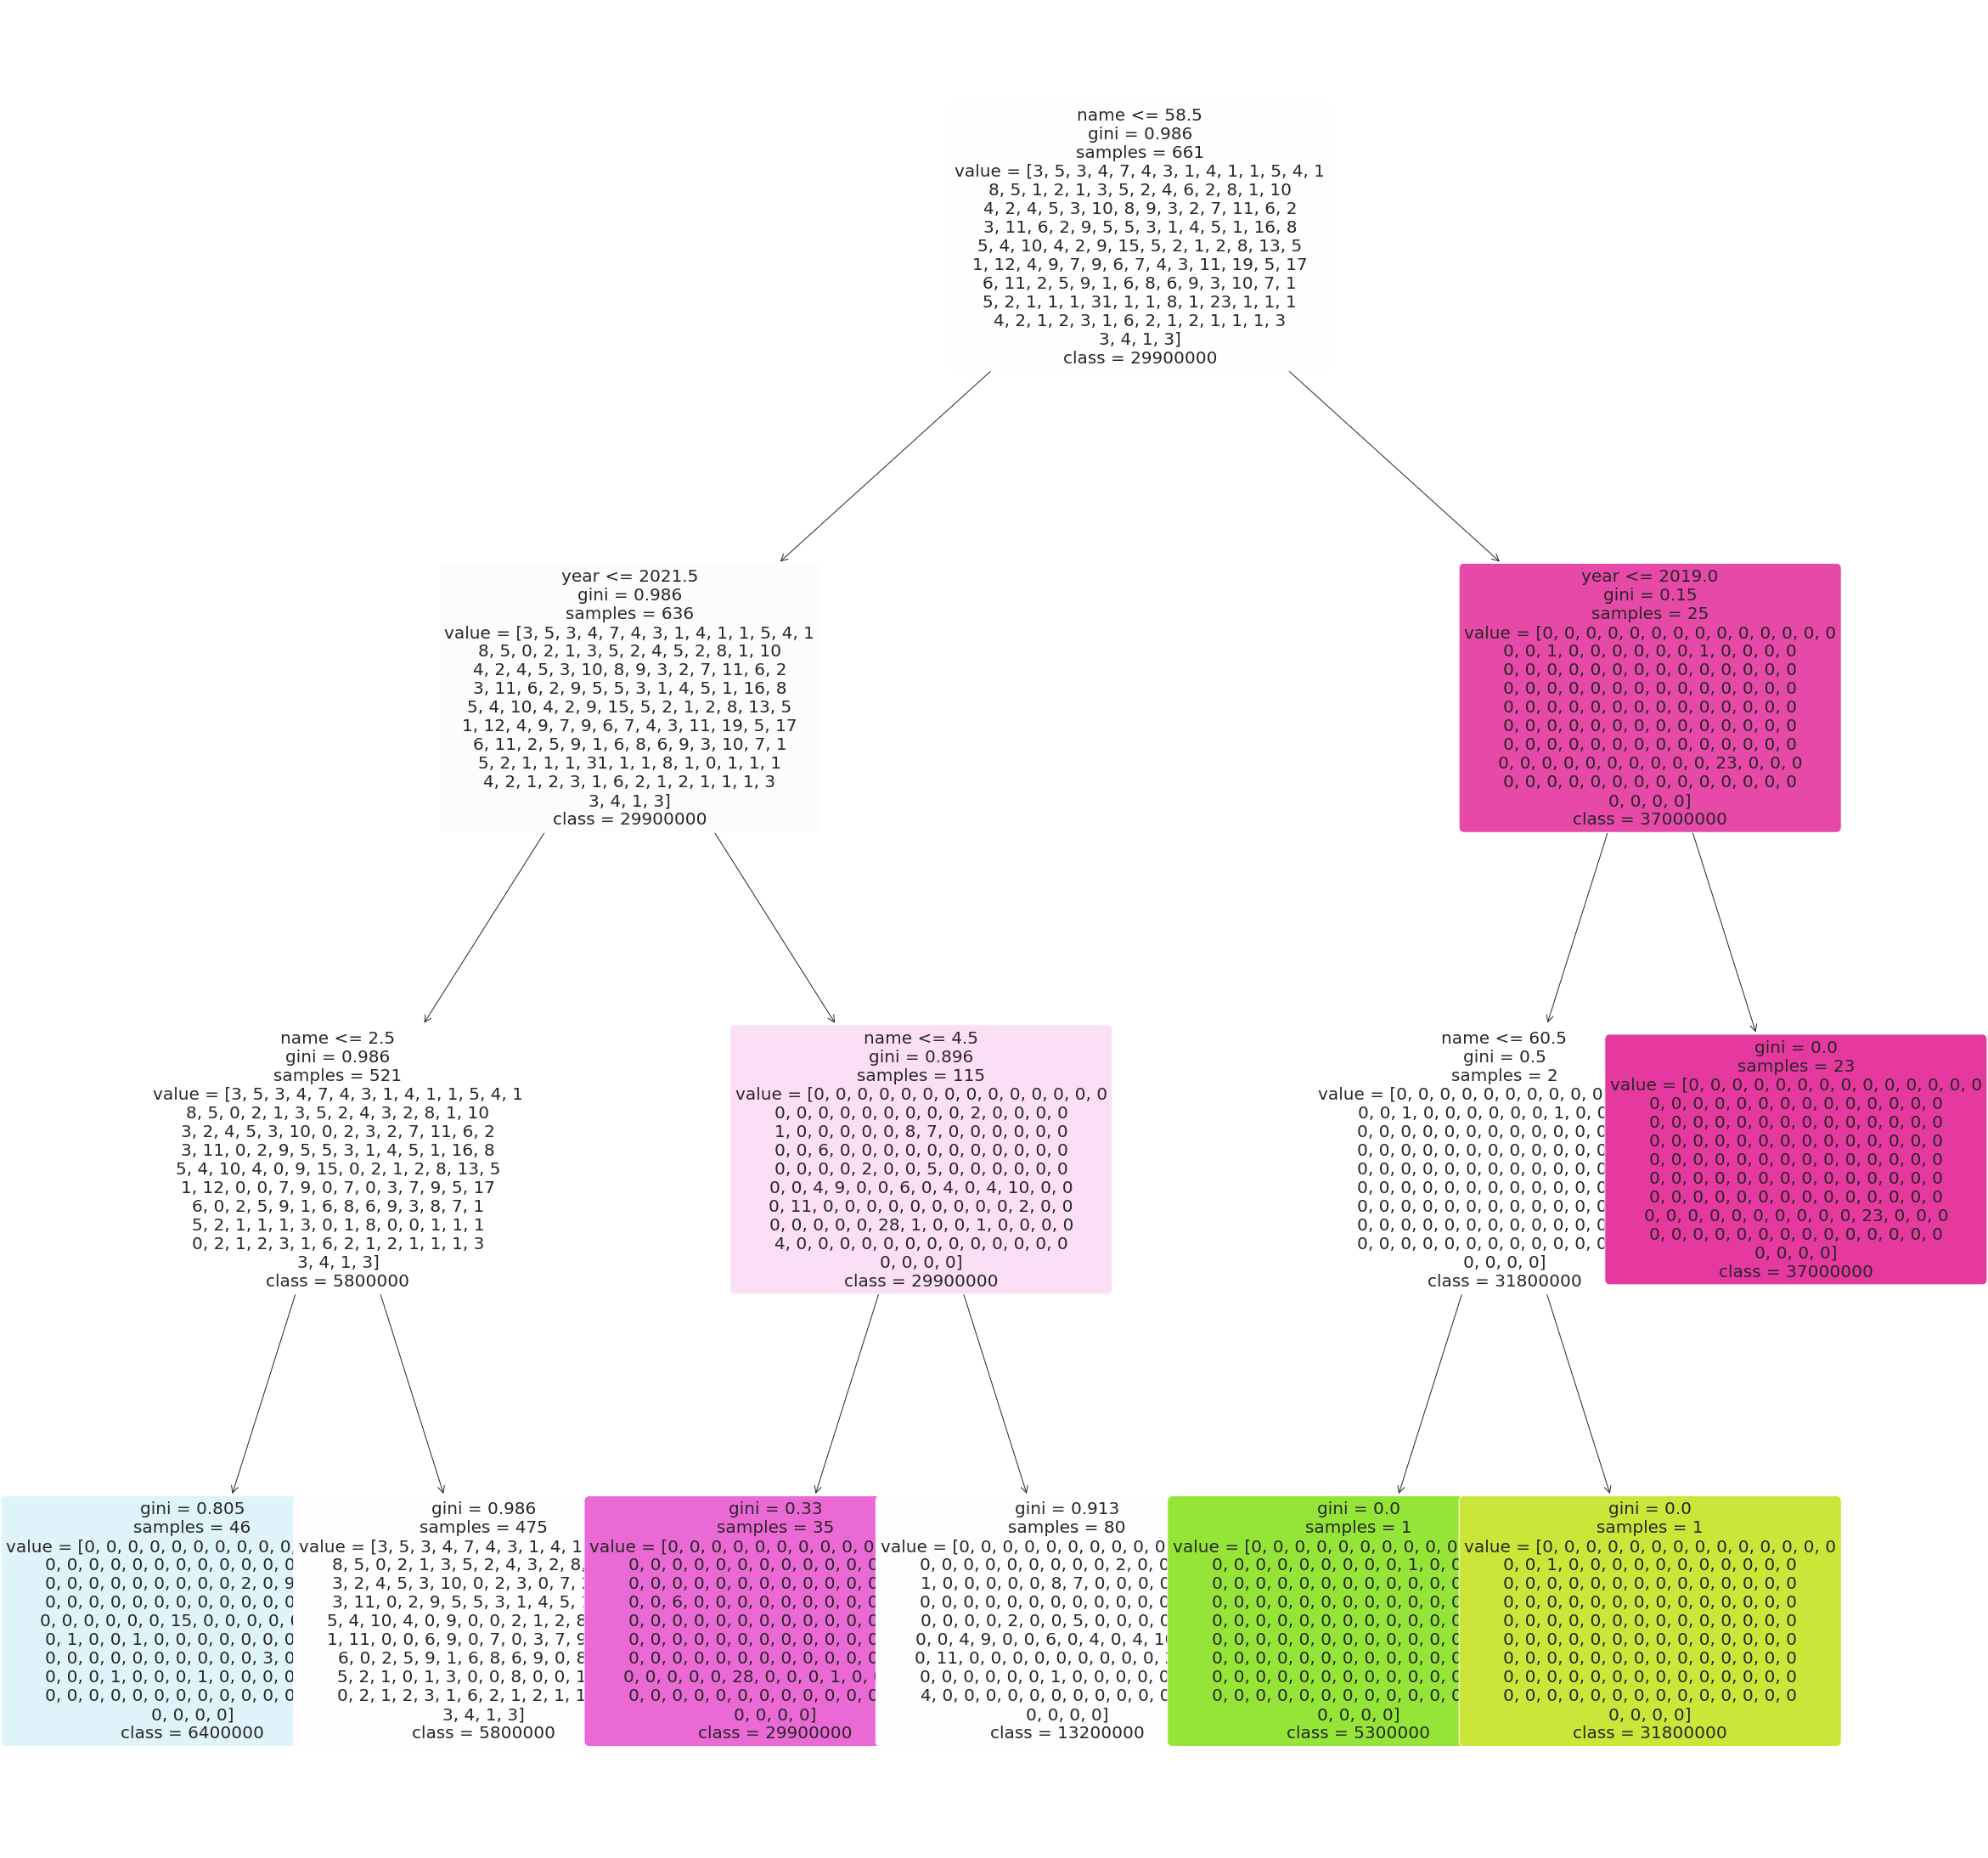

In [ ]:
# Plotting the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
graph_tree = plot_tree (rf,feature_names = ['name',	'year', 'seller_type', 'owner',	'km_driven'	],class_names = ['26000000' ,'27500000' ,'22300000' ,'8650000' ,'49000000' ,'23200000' ,'7000000' ,'11900000' ,'30000000' ,'2950000' ,'36500000' ,'34500000' ,'20000000' ,'18500000' ,'490000000' ,'12500000' ,'31800000' ,'8500000' ,'32500000' ,'22500000' ,'26500000' ,'14900000' ,'27900000' ,'5300000' ,'13500000' ,'134000000' ,'85000000' ,'15500000' ,'22000000' ,'29500000' ,'4500000' ,'25500000' ,'16950000' ,'16300000' ,'21500000' ,'5500000' ,'18550000' ,'28550000' ,'20250000' ,'24550000' ,'28850000' ,'25000000' ,'28250000' ,'24300000' ,'10600000' ,'30850000' ,'26850000' ,'27850000' ,'16000000' ,'16850000' ,'28900000' ,'48850000' ,'19800000' ,'29850000' ,'14850000' ,'5350000' ,'285000000' ,'28000000' ,'35000000' ,'425000000' ,'20500000' ,'28500000' ,'6400000' ,'23500000' ,'45000000' ,'185000000' ,'37900000' ,'24500000' ,'198000000' ,'15150000' ,'18700000' ,'4300000' ,'7900000' ,'77000000' ,'47500000' ,'24900000' ,'11000000' ,'19500000' ,'550000000' ,'32000000' ,'9000000' ,'13000000' ,'16769000' ,'5800000' ,'260000000' ,'13200000' ,'14500000' ,'73000000' ,'95000000' ,'10400000' ,'445000000' ,'299000000' ,'31000000' ,'8000000' ,'36000000' ,'33000000' ,'105000000' ,'19900000' ,'25900000' ,'10900000' ,'12300000' ,'340000000' ,'14000000' ,'29900000' ,'16800000' ,'6900000' ,'21900000' ,'12900000' ,'37000000' ,'90000000' ,'875000000' ,'37500000' ,'21850000' ,'20550000' ,'6500000' ,'9900000' ,'9300000' ,'5750000' ,'18800000' ,'7950000' ,'62500000' ,'10500000' ,'290000000' ,'48500000' ,'400000000' ,'50000000' ,'555000000' ,'18900000' ,'51000000' ,'330000000' ,'29000000' ,'15000000' ,'32800000' ,'19000000' ,'39000000' ,'11300000' ,'7500000' ,'10000000' ,'9700000'],filled=True,rounded=True,fontsize = 20)

In [ ]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.8132530120481928

In [ ]:
confusion_matrix(y_test, y_pred_test) 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

     2950000       0.00      0.00      0.00         1
     4300000       1.00      1.00      1.00         2
     4500000       1.00      1.00      1.00         1
     5300000       1.00      1.00      1.00         3
     5350000       0.67      1.00      0.80         2
     5500000       1.00      1.00      1.00         4
     5750000       1.00      1.00      1.00         1
     5800000       1.00      1.00      1.00         1
     6400000       1.00      1.00      1.00         1
     6500000       1.00      1.00      1.00         1
     6900000       0.00      0.00      0.00         1
     7000000       0.00      0.00      0.00         1
     7500000       1.00      1.00      1.00         1
     8000000       0.00      0.00      0.00         2
     8500000       0.00      0.00      0.00         0
     9000000       1.00      1.00      1.00         1
     9900000       1.00      1.00      1.00         2
    10400000       0.00    

In [ ]:
# saving the model
#import pickle 
#pickle.dump(rf, open('Random_forest model-data.pkl', 'wb'))